In [2]:
import numpy as np
import pandas as pd
FAOSTAT_country_data = pd.read_csv("global-food-agriculture-statistics/FAOSTAT_countries.csv", engine='python')
FAOSTAT_countries = FAOSTAT_country_data["Country"].unique()
CONTINENTS = ['Africa', 'Asia', 'Australia and New Zealand', 'Europe', 'Northern America', 'South America']


#### Population Growth vs Deforestation

In [48]:
df = pd.read_csv("global-food-agriculture-statistics/current_FAO/raw_files/Population_E_All_Data_(Normalized).csv", engine='python')

In [49]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1950,1950,1000 persons,7752.12,XU
1,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1951,1951,1000 persons,7839.51,XU
2,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1952,1952,1000 persons,7934.98,XU
3,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1953,1953,1000 persons,8038.60,XU
4,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1954,1954,1000 persons,8150.45,XU


In [50]:
df.Element.unique()

array(['Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'Rural population',
       'Urban population'], dtype=object)

In [51]:
df.Area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "C�te d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Czechoslovakia', "Democratic People's Republic of Korea",
  

In [52]:
df2 = df[(df.Element.str.contains('Total Population - Both sexes'))
& (df.Area.isin(FAOSTAT_countries))]\
.groupby(["Area", "Year"])\
.Value.sum().unstack("Year")

In [53]:
df2.head()

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7752.120,7839.510,7934.980,8038.600,8150.450,8270.580,8399.030,8535.810,8680.950,8834.450,...,71880.400,71755.600,71619.500,71472.800,71316.100,71150.200,70975.800,70793.70,70604.700,70409.600
Albania,1263.170,1287.500,1316.090,1348.100,1382.880,1419.970,1459.090,1500.150,1543.220,1588.480,...,1817.500,1798.030,1778.940,1760.230,1741.940,1724.060,1706.640,1689.69,1673.240,1657.310
Algeria,8872.250,9039.910,9216.400,9405.440,9609.510,9829.720,10065.800,10316.300,10578.400,10849.000,...,62825.000,62828.100,62823.800,62811.800,62791.900,62763.500,62726.400,62680.00,62623.500,62556.500
American Samoa,18.940,19.296,19.540,19.677,19.729,19.702,19.652,19.598,19.602,19.734,...,44.333,43.890,43.440,42.988,42.534,42.082,41.625,41.17,40.714,40.263
Andorra,6.196,6.689,7.247,7.865,8.525,9.232,9.989,10.779,11.615,12.498,...,64.333,64.197,64.071,63.940,63.809,63.679,63.544,63.41,63.267,63.125


In [54]:
p_diff =df2.iloc[:, 65] - df2.iloc[:, 40] #difference between year 2016 -1990
p_diff = p_diff.sort_values(ascending=False)

In [55]:
p_diff[:20]

Area
India                               438917.0
Nigeria                              85912.0
Pakistan                             81702.0
Indonesia                            76725.0
United States of America             67399.0
Brazil                               56610.0
Bangladesh                           55012.0
Democratic Republic of the Congo     41582.0
Mexico                               40533.1
Philippines                          39768.7
Egypt                                36366.0
United Republic of Tanzania          28420.4
Viet Nam                             25362.0
Turkey                               24349.8
Kenya                                23833.8
Iran (Islamic Republic of)           23134.3
Uganda                               22706.0
Afghanistan                          21487.4
Iraq                                 18646.6
South Africa                         17730.7
dtype: float64

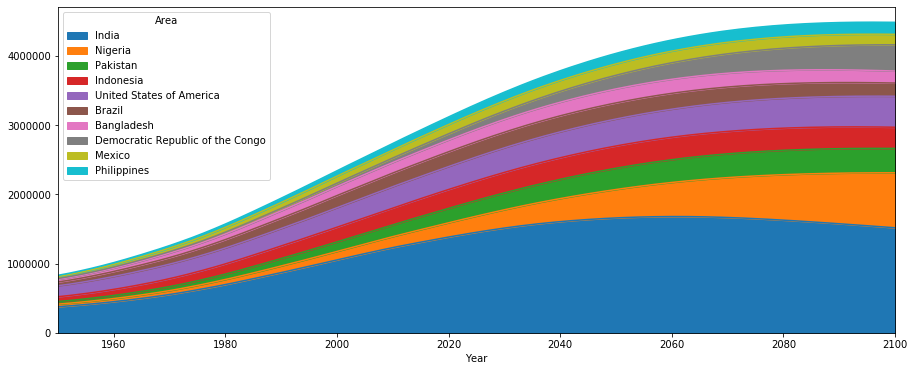

In [56]:
# By conparing following figure and figure in main.py, we found that correlation between population growth and deforestation are limited
df2.loc[p_diff[:10].index].T.plot.area(figsize=(15,6))

#### Artificial surface growth vs deforestation

In [58]:
df = pd.read_csv("global-food-agriculture-statistics/current_FAO/raw_files/Environment_LandCover_E_All_Data_(Normalized).csv", engine='python')

In [59]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6970,Artificial surfaces (including urban and assoc...,5007,Area from MODIS,2001,2001,1000 ha,71.0899,FC
1,2,Afghanistan,6970,Artificial surfaces (including urban and assoc...,5007,Area from MODIS,2002,2002,1000 ha,71.0770,FC
2,2,Afghanistan,6970,Artificial surfaces (including urban and assoc...,5007,Area from MODIS,2003,2003,1000 ha,71.0749,FC
3,2,Afghanistan,6970,Artificial surfaces (including urban and assoc...,5007,Area from MODIS,2004,2004,1000 ha,71.0563,FC
4,2,Afghanistan,6970,Artificial surfaces (including urban and assoc...,5007,Area from MODIS,2005,2005,1000 ha,71.0749,FC


In [60]:
df.Item.unique()

array(['Artificial surfaces (including urban and associated areas)',
       'Herbaceous crops', 'Woody crops', 'Multiple or layered crops',
       'Grassland', 'Tree-covered areas', 'Mangroves',
       'Shrub-covered areas',
       'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded',
       'Sparsely natural vegetated areas', 'Terrestrial barren land',
       'Permanent snow and glaciers', 'Inland water bodies',
       'Coastal water bodies and intertidal areas'], dtype=object)

In [61]:
df[df.Item == 'Artificial surfaces (including urban and associated areas)'].Element.unique()

array(['Area from MODIS', 'Area from CCI_LC'], dtype=object)

In [62]:
df2 = df[df.Item == 'Artificial surfaces (including urban and associated areas)']

In [63]:
df2 = df2[(df.Element.str.contains('Area from MODIS'))
& (df2.Area.isin(FAOSTAT_countries))]\
.groupby(["Area", "Year"])\
.Value.sum().unstack("Year")

/mnt/c/linux_home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [64]:
df2.head()

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Area,,,,,,,,,,,,
Afghanistan,71.0899,71.0770,71.0749,71.0563,71.0749,71.0372,71.0846,71.0310,71.0523,71.0295,71.0306,71.0331
Albania,18.7318,18.7320,18.7377,18.7352,18.7350,18.7225,18.7241,18.7171,18.7304,18.7320,18.7377,18.7330
Algeria,301.0938,301.0922,301.0880,301.1057,301.0934,301.0994,301.0886,301.0970,301.1103,300.9938,301.1224,301.0043
American Samoa,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Andorra,1.4851,1.4838,1.4855,1.5216,1.5262,1.5211,1.4833,1.5211,1.4798,1.5216,1.5266,1.5252


In [65]:
# this figure is close to JPN Gov. data, area of housing
df2.loc['Japan']

Year
2001    1869.9430
2002    1868.3569
2003    1869.3215
2004    1869.8328
2005    1870.6500
2006    1868.8959
2007    1869.0325
2008    1867.5417
2009    1868.8052
2010    1870.2912
2011    1871.2701
2012    1870.2925
Name: Japan, dtype: float64

In [67]:
p_diff =df2.iloc[:, 11] - df2.iloc[:, 0] #difference between year 2012 -2001
p_diff = p_diff.sort_values(ascending=False)

In [68]:
# growth of artificial area is small
p_diff[:20]

Area
Hungary                          3.6865
Republic of Korea                3.3520
India                            2.1570
Spain                            1.4227
Singapore                        1.3507
Bahrain                          1.2114
Romania                          1.1982
Austria                          0.9909
Turkey                           0.9358
Ghana                            0.5951
France                           0.5171
Jordan                           0.4618
Mexico                           0.4568
Netherlands                      0.4275
Japan                            0.3495
Portugal                         0.3360
Ukraine                          0.3281
Netherlands Antilles (former)    0.2704
Slovakia                         0.2177
Belgium                          0.2123
dtype: float64

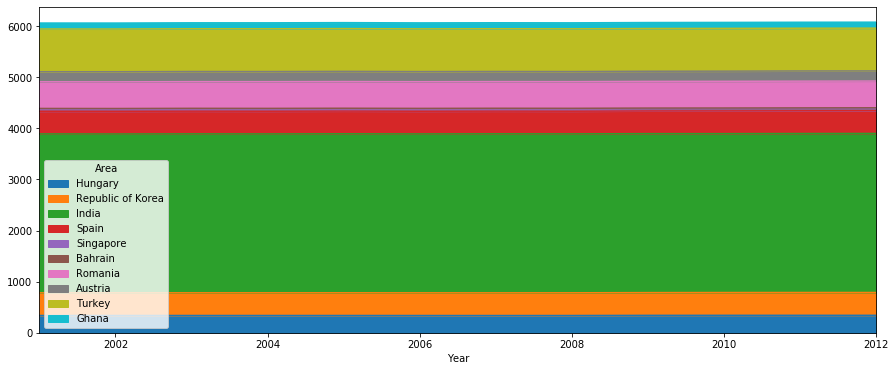

In [69]:
# growth of artificial area is small, so its impact on deforestation is negligible
df2.loc[p_diff[:10].index].T.plot.area(figsize=(15,6))

#### Growth of Tree-covered areas match to deforestation trend? 

In [28]:
df3 = df[df.Item == 'Tree-covered areas']

In [29]:
df3 = df3[(df.Element.str.contains('Area from MODIS'))
& (df3.Area.isin(FAOSTAT_countries))]\
.groupby(["Area", "Year"])\
.Value.sum().unstack("Year")

/mnt/c/linux_home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [30]:
df3.head()

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Area,,,,,,,,,,,,
Afghanistan,277.8579,257.0200,231.4933,219.8316,234.2625,230.6606,254.0050,237.3392,325.2375,325.6402,372.6691,385.0191
Albania,445.3538,481.3801,420.6624,496.9820,399.5119,531.2831,586.5037,721.3579,760.7334,790.5335,813.6812,758.7507
Algeria,1007.2961,961.4381,884.2037,913.2712,948.4441,973.3383,893.1138,952.0809,830.2515,1083.5742,895.4800,1022.4781
American Samoa,15.6778,14.5878,14.7643,13.0864,14.0231,14.5090,13.8411,14.5132,13.2618,14.1558,13.2383,13.5248
Andorra,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [34]:
p_diff =df3.iloc[:, 11] - df3.iloc[:, 0] #difference between year 2012 -2001
p_diff = p_diff.sort_values(ascending=False)

In [35]:
# the number of tree covered area in the dataset are much smaller. 
# the tree-covered area has different definition from forest areas.
p_diff[:20]

Area
Canada                                   28937.2791
Brazil                                   17876.2240
Russian Federation                       15986.9831
Democratic Republic of the Congo          4501.9781
United States of America                  4455.4586
Venezuela (Bolivarian Republic of)        4113.5631
Philippines                               3702.2337
Spain                                     2324.8984
Mozambique                                2244.0904
United Republic of Tanzania               1906.5988
Zimbabwe                                  1788.7810
Italy                                     1529.5486
Angola                                    1274.5022
Greece                                    1246.7949
Finland                                   1213.6261
Japan                                     1141.4283
Belarus                                   1131.6412
Democratic People's Republic of Korea     1035.7589
Ukraine                                   1033.9311
Liberia

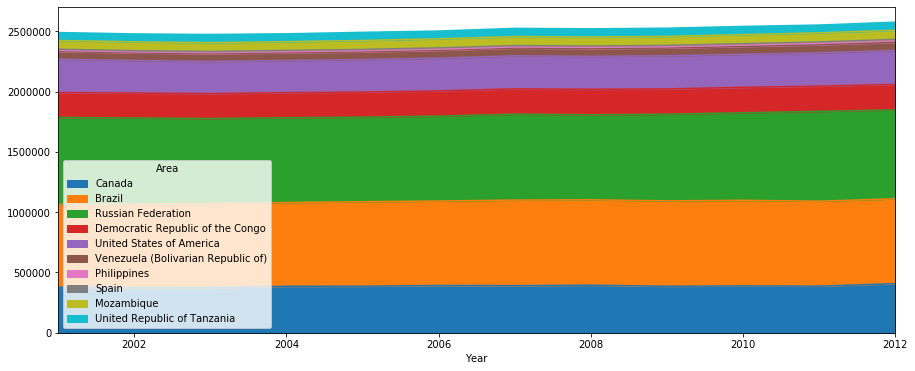

In [37]:
df3.loc[p_diff[:10].index].T.plot.area(figsize=(15,6))

In [46]:
df3.loc['Brazil']

Year
2001    685469.5644
2002    692677.7111
2003    698455.3295
2004    694022.4639
2005    700465.8199
2006    699923.3961
2007    709080.7868
2008    707793.9751
2009    707654.8192
2010    709549.5345
2011    704056.5881
2012    703345.7884
Name: Brazil, dtype: float64

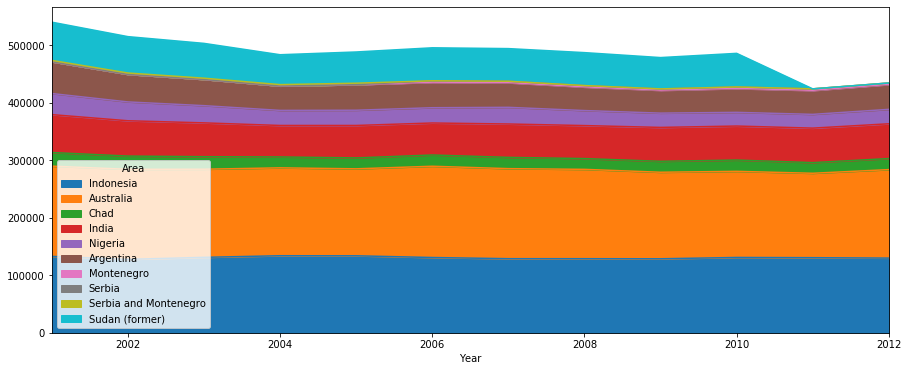

In [41]:
df3.loc[p_diff[-10:].index].T.plot.area(figsize=(15,6))

In [3]:
df = pd.read_csv("global-food-agriculture-statistics/current_FAO/raw_files/Forestry_Trade_Flows_E_All_Data_(Normalized).csv", engine='python')

In [4]:
df.head()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,10,Australia,1640,Plywood,5616,Import Quantity,1999,1999,m3,5.0,R
1,2,Afghanistan,10,Australia,1640,Plywood,5622,Import Value,1999,1999,1000 US$,5.0,NaN
2,2,Afghanistan,10,Australia,1646,Particle board and OSB,5616,Import Quantity,1999,1999,m3,65.0,R
3,2,Afghanistan,10,Australia,1646,Particle board and OSB,5622,Import Value,1999,1999,1000 US$,1.0,NaN
4,2,Afghanistan,10,Australia,1877,Forest products (export/import),5622,Import Value,1999,1999,1000 US$,6.0,NaN
